In [1]:
import word2vec
import numpy as np
np.set_printoptions(threshold=np.nan, precision=5, suppress=True)
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [2]:
with open ('drugbank_words_all_count', 'rb') as fp:
    count = word2vec.pickle.load(fp)
all_words = [pair[0] for pair in count]
with open ('drugbank_words_all_reverse_dictionary_filter_concatenated_drug_names_all_500', 'rb') as fp:
    reverse_dictionary = word2vec.pickle.load(fp)
with open('drug_names_all_500', 'rb') as fp:
    drug_names = word2vec.pickle.load(fp)
with open('concatenated_drug_names_all_500', 'rb') as fp:
    concatenated_drug_names = word2vec.pickle.load(fp)
vocabulary_size = len(reverse_dictionary)
vocabulary_size

479

In [3]:
labels = []
new_reverse_dictionary = {}
for index, word in reverse_dictionary.items():
    drug = drug_names[concatenated_drug_names.index(word)]
    word_count = count[all_words.index(word)][1]
    new_reverse_dictionary[index] = drug
    labels.append(drug)
    print(str(index) + ' ' + drug + ' ' + str(word_count))


0 Cyclosporine 3349
1 Phenytoin 3140
2 Venlafaxine 3032
3 Fluvoxamine 2897
4 Brimonidine 2893
5 Imipramine 2862
6 Diltiazem 2861
7 Citalopram 2753
8 Clozapine 2751
9 Pentobarbital 2724
10 Metoprolol 2723
11 Digoxin 2705
12 Chlorpromazine 2705
13 Haloperidol 2666
14 Quinine 2636
15 Morphine 2621
16 Methadone 2593
17 Ziprasidone 2573
18 Fluoxetine 2553
19 Amitriptyline 2552
20 Ritonavir 2537
21 Indinavir 2531
22 Isradipine 2426
23 Ticlopidine 2407
24 Dihydroergotamine 2400
25 Nelfinavir 2399
26 Reserpine 2375
27 Bortezomib 2328
28 Clotrimazole 2324
29 Clemastine 2317
30 Erythromycin 2278
31 Atenolol 2263
32 Duloxetine 2248
33 Ranolazine 2244
34 Celecoxib 2236
35 Ropinirole 2229
36 Sildenafil 2217
37 Sulfisoxazole 2178
38 Nevirapine 2168
39 Lovastatin 2147
40 Timolol 2130
41 Protriptyline 2118
42 Fluconazole 2107
43 Indomethacin 2104
44 Betaxolol 2074
45 Olanzapine 2041
46 Secobarbital 2041
47 Promazine 2021
48 Lidocaine 2021
49 Atomoxetine 2007
50 Mirtazapine 1997
51 Clobazam 1981
52 Bus

In [4]:
final_embeddings = np.load('final_embeddings_all_skip-gram_64_8_4_filter_concatenated_drug_names_all_500.npy')
Z = np.load('final_embeddings_all_skip-gram_64_8_4_filter_concatenated_drug_names_all_500_linkage_ward.npy')

In [5]:
W = []
for z in Z:
    w = []
    if z[0] < vocabulary_size:
        w.append(new_reverse_dictionary[int(z[0])])
    else:
        w.append(z[0])
    if z[1] < vocabulary_size:
        w.append(new_reverse_dictionary[int(z[1])])
    else:
        w.append(z[1])
    w.append(z[2])
    W += [w]
    print(w)

['Ampicillin', 'Capreomycin', 0.2850246954149514]
['Ethoxzolamide', 'Cefalotin', 0.28714395347906913]
['Cefotaxime', 480.0, 0.2951228335894997]
['Travoprost', 'Colestipol', 0.31838366217727054]
['Metocurine Iodide', 'Alglucerase', 0.31999189677884876]
['Pipobroman', 'Palifermin', 0.34442129186931897]
['Loratadine', 'Zolmitriptan', 0.34445135930916493]
['Carisoprodol', 481.0, 0.34721886565417154]
['Raloxifene', 482.0, 0.34922157735220655]
['Piperacillin', 479.0, 0.35022527549905241]
['Menotropins', 485.0, 0.35904245852908151]
['Flucloxacillin', 'Phenoxymethylpenicillin', 0.36037688710806198]
['Ceftazidime', 'Cefmetazole', 0.36162309896288486]
['Trimethadione', 'L-Threonine', 0.37108684923964952]
['Olanzapine', 487.0, 0.37663191494760156]
['Acitretin', 'Tioguanine', 0.37913643428259253]
['Ibutilide', 'Omalizumab', 0.38302903389242104]
['Coagulation Factor IX (Recombinant)', 488.0, 0.38333465944435535]
['Immune Globulin Human', 'Sargramostim', 0.38702697818961351]
['L-Lysine', 486.0, 0.38

In [10]:
max_d = 0.75
clusters = fcluster(Z, max_d, criterion='distance')
n_clusters = np.amax(clusters)
organized_clusters = []
for i in range(1, n_clusters + 1):
    cluster = []
    for j in range(vocabulary_size):
        if clusters[j] == i:
            cluster.append(new_reverse_dictionary[j])
    organized_clusters.append(cluster)
print(organized_clusters)

[['Gemcitabine', 'Zoledronic acid', 'Procyclidine', 'Pegaspargase'], ['Codeine', 'Thiamine'], ['Cetuximab'], ['Valproic Acid', 'Nabumetone', 'Nitroprusside', 'Aminohippuric acid', 'Flutamide', 'Carboprost Tromethamine'], ['Atomoxetine', 'Droperidol', 'Gadodiamide'], ['Miglitol', 'Oseltamivir'], ['Treprostinil', 'Denileukin diftitox'], ['Tenoxicam', 'Tolmetin', 'Streptozocin', 'Metixene', 'Miglustat', 'Oxytocin', 'Dornase alfa'], ['Alemtuzumab', 'Darbepoetin alfa', 'S-Adenosylmethionine', 'Indecainide'], ['Ethopropazine', 'Phenylpropanolamine', 'Daptomycin', 'L-Methionine'], ['Etomidate', 'Carbidopa', 'Cyanocobalamin', 'Phosphatidyl serine', 'Laronidase'], ['Carbachol', 'Daclizumab', 'Alefacept', 'Anti-thymocyte Globulin (Rabbit)', 'L-Glutamic Acid', 'Pegademase bovine', 'Follitropin beta', 'L-Arginine', 'L-Alanine'], ['Hydromorphone', 'Carisoprodol', 'Terfenadine', 'Vinorelbine', 'Trimethadione', 'Calcium Gluceptate', 'Dipivefrin', 'Ethoxzolamide', 'Metocurine Iodide', 'Acitretin', 'Ti

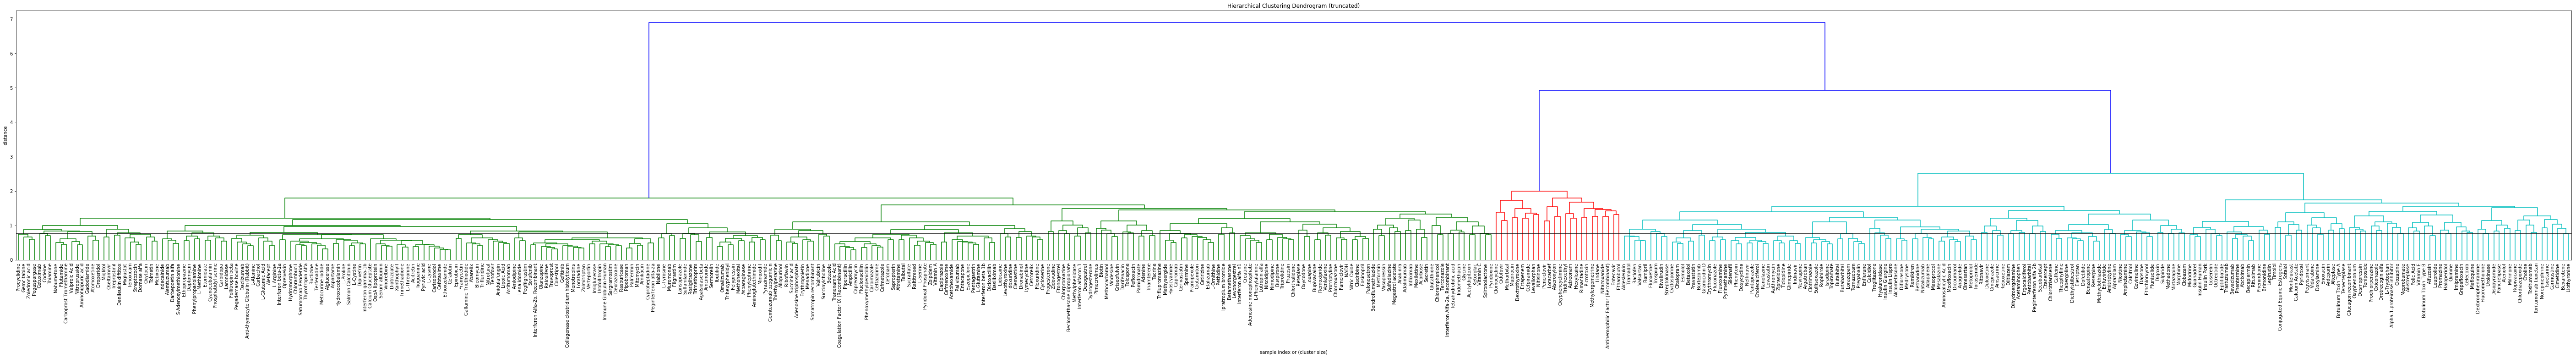

In [11]:
plt.figure(figsize=(100, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=512,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    labels = labels,
)
plt.axhline(y=max_d, c='k')
plt.show()